     Field of Study  Current Occupation   Age  Gender  Years of Experience  \
0          Medicine    Business Analyst  48.0    Male                  7.0   
1         Education           Economist  44.0    Male                 26.0   
2         Education           Biologist  21.0  Female                 27.0   
3         Education    Business Analyst  33.0    Male                 14.0   
4              Arts              Doctor  28.0  Female                  0.0   
5          Medicine              Lawyer  56.0    Male                 39.0   
6          Medicine  Software Developer  51.0  Female                 29.0   
7          Medicine              Artist  58.0  Female                 32.0   
8  Computer Science  Software Developer  31.0  Female                 38.0   
9          Business              Doctor  30.0  Female                 16.0   

  Education Level Industry Growth Rate  Job Satisfaction  Work-Life Balance  \
0     High School                 High               7.0      

C:\Users\DELL\AppData\Local\Temp\ipykernel_22548\3475707462.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Salary", x="Current Occupation", data=df, palette="Accent")


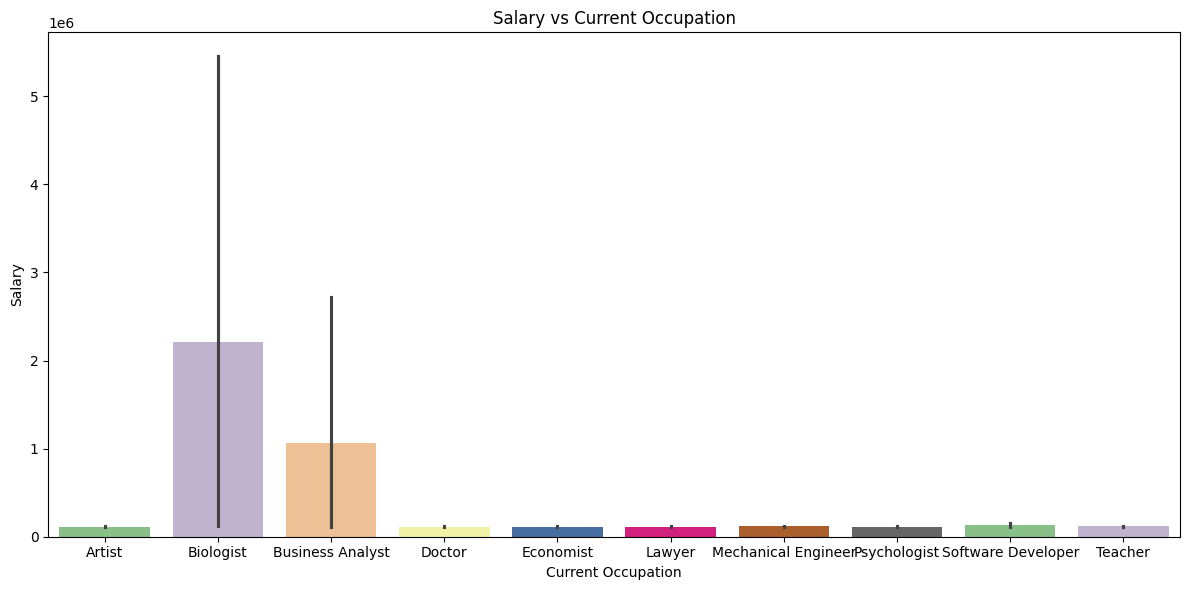

C:\Users\DELL\AppData\Local\Temp\ipykernel_22548\3475707462.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Field of Study', y='Likely to Change Occupation', data=df, palette='viridis')


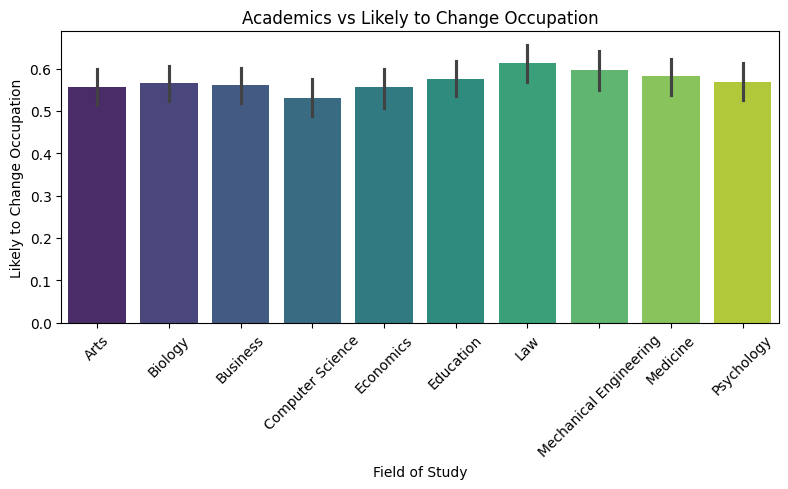

C:\Users\DELL\AppData\Local\Temp\ipykernel_22548\3475707462.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="Salary", data=df, palette="Set2")


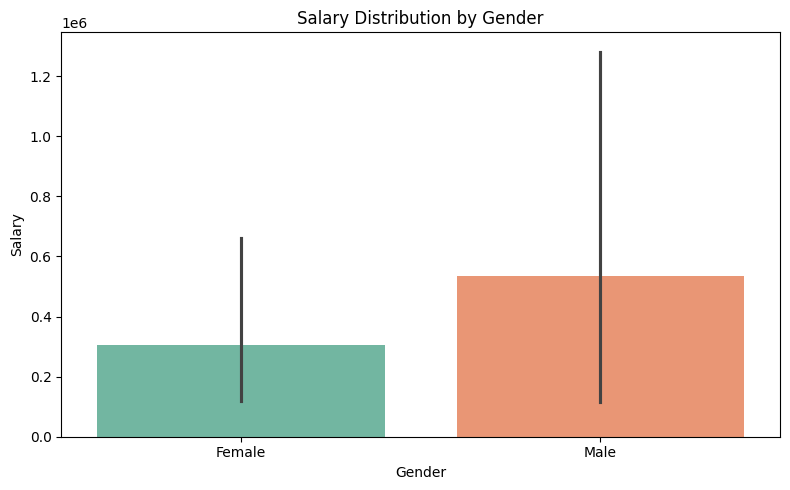

C:\Users\DELL\AppData\Local\Temp\ipykernel_22548\3475707462.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Likely to Change Occupation", y="Age", data=df, palette="pastel")


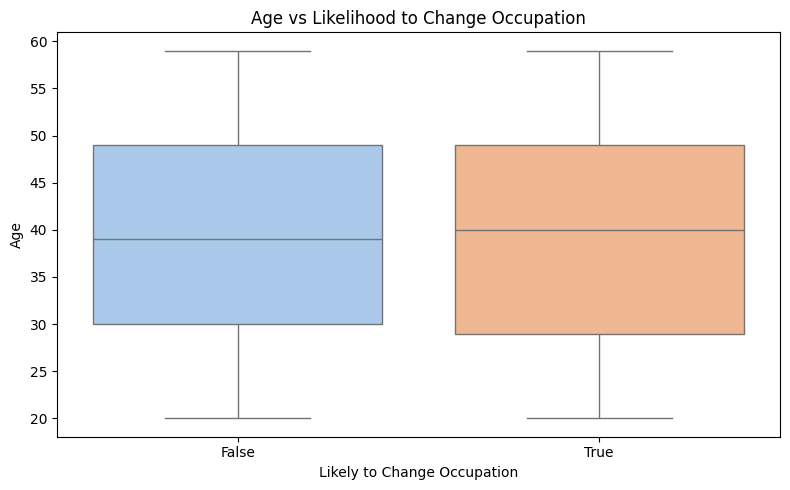

C:\Users\DELL\AppData\Local\Temp\ipykernel_22548\3475707462.py:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Likely to Change Occupation", y="Job Satisfaction", data=df, palette="coolwarm")


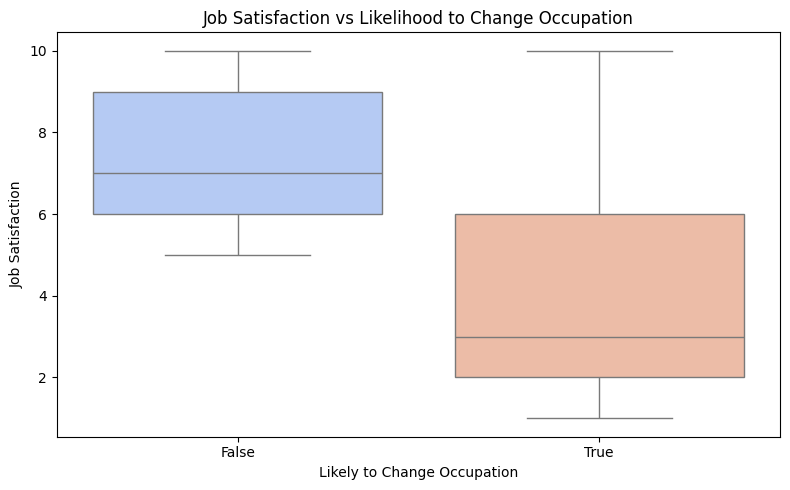

C:\Users\DELL\AppData\Local\Temp\ipykernel_22548\3475707462.py:158: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Likely to Change Occupation", y="Work-Life Balance", data=df, palette="Accent")


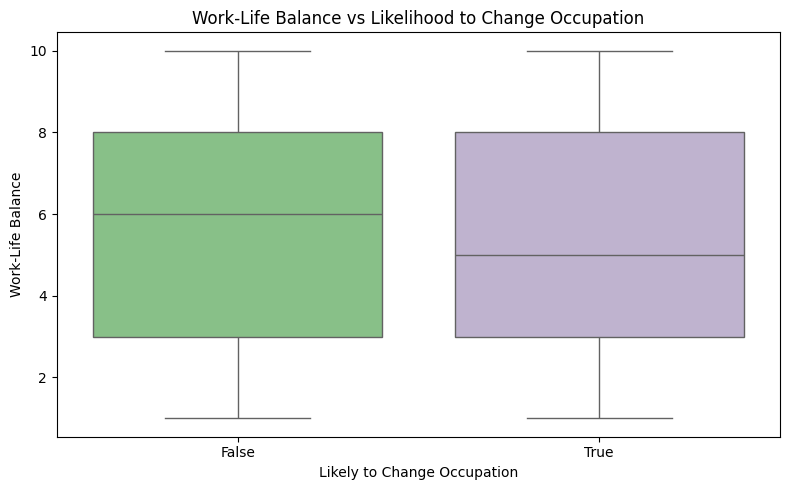

C:\Users\DELL\AppData\Local\Temp\ipykernel_22548\3475707462.py:168: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(y="Salary", x="Years of Experience", data=df, palette="Accent")


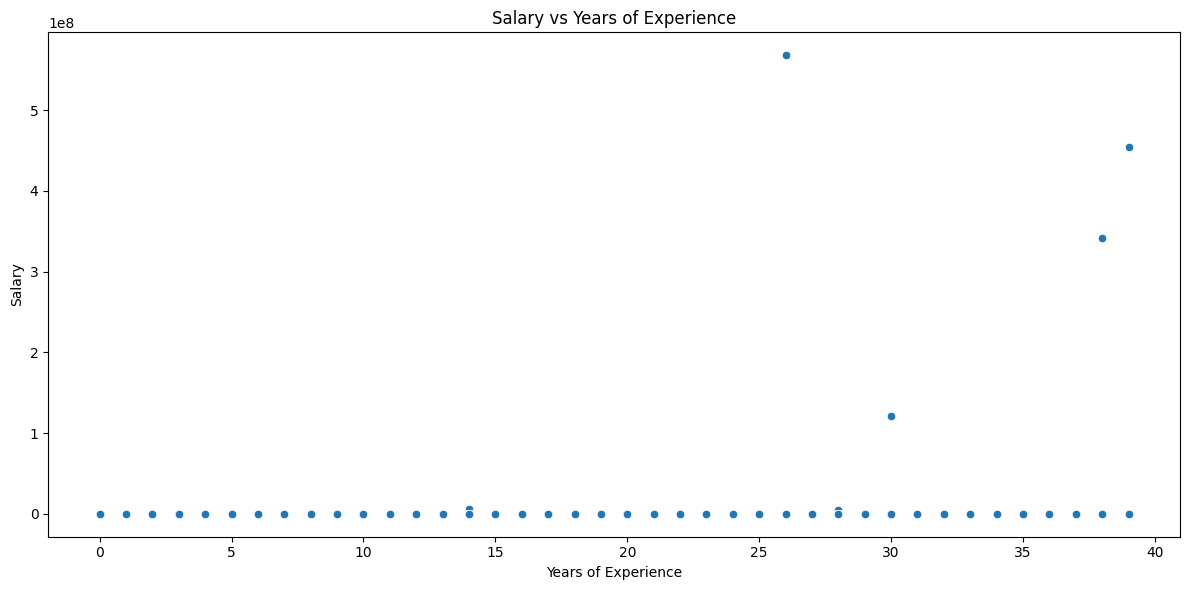

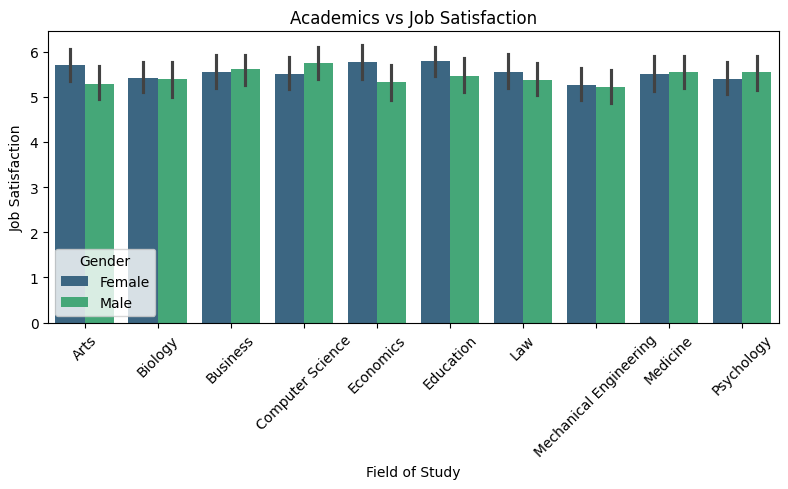

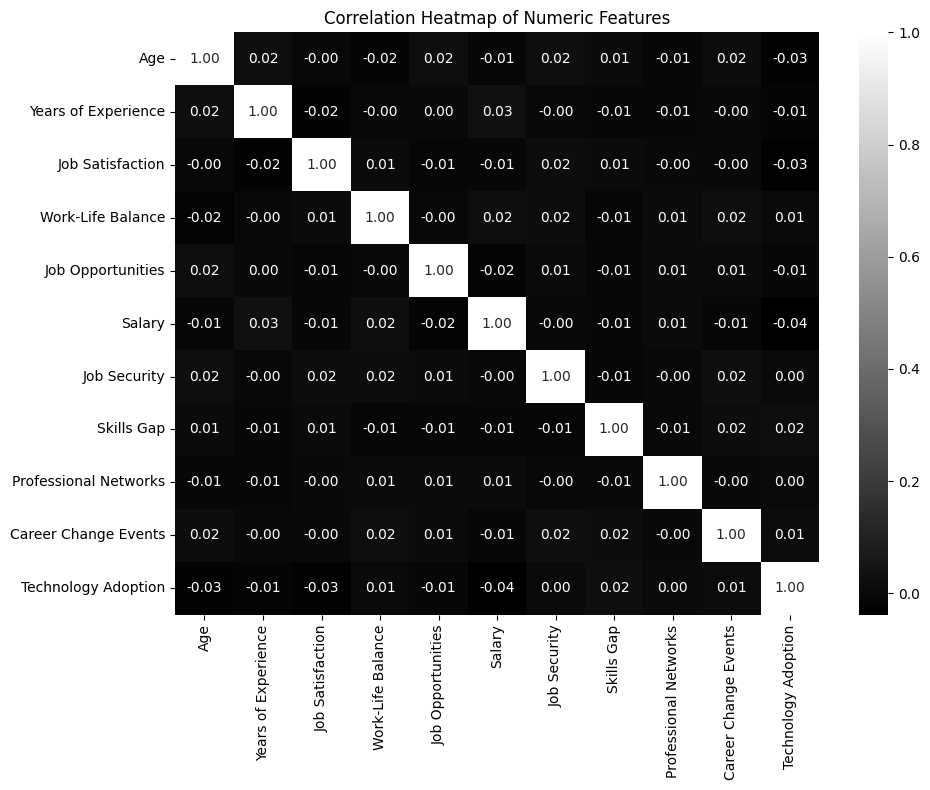

In [2]:
#Objective: 
#Explore whether individuals change their occupation based on academic background, job experience, and demographics.
#Focus: Preprocessing + Exploratory Data Analysis (EDA),

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Career data_PDA_4053.xlsx")

# Displaying the first ten rows helps verify that columns loaded correctly. 

print(df.head(10))

# Displaying dataset metadata such as column types, missing values, and memory use. 

print(df.info())

# Summary statistics for numerical columns

print(df.describe())



# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values) 


# Cleaning the 'Salary' column by removing commas and correcting format issues.

def clean_salary(value):
    if pd.isna(value) or isinstance(value, (int, float)):
        return value
    try:
        # Ensure it's a string before calling replace
        s_value = str(value).replace(',', '')
        return float(s_value)
    except ValueError:
        return np.nan
    
df['Salary'] = df['Salary'].apply(clean_salary)
print("Cleaned 'Salary' column head:")
print(df['Salary'].head())


# Convert categorical text fields to category type
cat_cols = [
    'Gender', 'Education Level', 'Field of Study', 'Current Occupation',
    'Career Change Interest', 'Certifications', 'Geographic Mobility'
]
df[cat_cols] = df[cat_cols].astype('category')


# Convert boolean-like columns to actual boolean dtype
df = df.astype({
    'Career Change Interest': 'bool',
    'Certifications': 'bool',
    'Freelancing Experience': 'bool',
    'Geographic Mobility': 'bool',
    'Likely to Change Occupation': 'bool'
})


# Total columns: 21
print("Columns in dataset:", df.columns.tolist())

# Handle missing values (example: fill with mean for numerical columns)

df.isnull().sum()


#dropping null values

df = df.dropna()
print("After dropping missing values, new shape:", df.shape)

#After dropping missing values, After dropping missing values, new shape: (4954, 21)

#Permanently Set Category Order in Your DataFrame

df['Education Level'] = pd.Categorical(
    df['Education Level'],
    categories=['High School', "Bachelor's", "Master's", 'PhD'],
    ordered=True
)

#Detecting and treating outliers using IQR method

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    if not outliers.empty:
        print(f"Outliers in {col}:\n", outliers, "\n")


# # Visualizations

#   Academics vs Salary
plt.figure(figsize=(12,6))
sns.barplot(y="Salary", x="Current Occupation", data=df, palette="Accent")
plt.title("Salary vs Current Occupation")
plt.ylabel("Salary")
plt.xlabel("Current Occupation")
plt.tight_layout()
plt.show()


#  Field of Study vs likely to change occupation

plt.figure(figsize=(8,5))
sns.barplot(x='Field of Study', y='Likely to Change Occupation', data=df, palette='viridis')
plt.title('Academics vs Likely to Change Occupation')
plt.xlabel('Field of Study')
plt.ylabel('Likely to Change Occupation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Salary Distribution by Gender
plt.figure(figsize=(8,5))
sns.barplot(x="Gender", y="Salary", data=df, palette="Set2")
plt.title("Salary Distribution by Gender")
plt.ylabel("Salary")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

#  Age vs Likely to Change Occupation
plt.figure(figsize=(8,5))
sns.boxplot(x="Likely to Change Occupation", y="Age", data=df, palette="pastel")
plt.title("Age vs Likelihood to Change Occupation")
plt.ylabel("Age")
plt.xlabel("Likely to Change Occupation")
plt.tight_layout()
plt.show()

#  Job Satisfaction vs Likely to Change Occupation

plt.figure(figsize=(8,5))
sns.boxplot(x="Likely to Change Occupation", y="Job Satisfaction", data=df, palette="coolwarm")
plt.title("Job Satisfaction vs Likelihood to Change Occupation")
plt.ylabel("Job Satisfaction")
plt.xlabel("Likely to Change Occupation")
plt.tight_layout()
plt.show()

#  Work-Life Balance vs Likely to Change Occupation

plt.figure(figsize=(8,5))
sns.boxplot(x="Likely to Change Occupation", y="Work-Life Balance", data=df, palette="Accent")
plt.title("Work-Life Balance vs Likelihood to Change Occupation")
plt.ylabel("Work-Life Balance")
plt.xlabel("Likely to Change Occupation")
plt.tight_layout()
plt.show()


#   Salary vs Years of Experience
plt.figure(figsize=(12,6))
sns.scatterplot(y="Salary", x="Years of Experience", data=df, palette="Accent")
plt.title("Salary vs Years of Experience")
plt.ylabel("Salary")
plt.xlabel("Years of Experience")
plt.tight_layout()
plt.show()

# # Field of Study vs Job Satisfaction

plt.figure(figsize=(8,5))
sns.barplot(x='Field of Study', y='Job Satisfaction',hue='Gender', data=df, palette='viridis')
plt.title('Academics vs Job Satisfaction')
plt.xlabel('Field of Study')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

#  Correlation heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="grey")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()







